### Principal components analysis (Dimensionality Reduction) with application


In [146]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib.patches import Circle 

In [147]:

class PCA:
    """This class performs dimensionality reduction using Principal Component Analysis (PCA).
    -----------
    Attrs:
    -----------
    eigen_values: np.ndarray
        Eigenvalues of the covariance/correlation matrix.
    eigen_vectors: np.ndarray
        Corresponding eigenvectors of the covariance/correlation matrix.
    shape: tuple
        Shape of the input data.
    normed_: bool
        Whether to normalize the data.
    features: np.ndarray
        Features of the input data.
    instances: np.ndarray
        Instances of the input data.
    new_axes: np.ndarray
        New axes after transformation.
    """

    def __init__(self, normed_=True):
        self.eigen_values = None
        self.eigen_vectors = None
        self.shape = None
        self.normed_ = normed_
        self.features = None
        self.instances = None
        self.new_axes = None
        
    def fit(self, data: pd.DataFrame):
        """Fit PCA on the input data.
        -----------
        @Params:
        -----------
        data: pd.DataFrame
            Input data for PCA.

        Raises:
        -------
        Exception: if data is not a DataFrame.

        """
        if not isinstance(data, pd.DataFrame):
            raise Exception('data needs to be a DataFrame object!')
        
        self.features = data.columns
        self.instances = data.index
        self.shape = data.shape
        normed_matrix ,cov_or_corr_matrix = self.corr_cov_matrix(data.values)
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_or_corr_matrix)

        # Normalize eigenvectors
        for i in range(len(self.eigen_vectors)):
            norm = np.linalg.norm(self.eigen_vectors[:,i])
            self.eigen_vectors[:,i] = self.eigen_vectors[:,i] / norm

        self.new_axes = np.matmul(normed_matrix , self.eigen_vectors)

    def corr_cov_matrix(self, data: np.ndarray) -> np.ndarray:
        """Compute the covariance/correlation matrix.
        -----------
        @Params:
        -----------
        data: np.ndarray
            Input data.

        Returns:
        --------
        np.ndarray
            Covariance/correlation matrix of the input data.

        """
        if self.normed_:
            normed_mat = (data- np.mean(data,0)) / np.std(data,0)
            return normed_mat ,np.corrcoef(data,rowvar=False)
        else:
            normed_mat = (data- np.mean(data,0))
            return normed_mat ,np.cov(data,rowvar=False)

        


    def describe_(self) -> tuple:
        """Method to compute elements for interpretation purposes.

        Returns:
        --------
        tuple
            - eigen_values contribution.
            - absolute contribution for instances.
            - new instances for making 2D plot.
            - correlation matrix (correlation cercle).
         """
        eig_ctr = pd.Series((self.eigen_values * 100) / np.sum(self.eigen_values))
        abs_ctr_inst = pd.DataFrame((1 / self.shape[0]) * (self.new_axes**2) * 100 / self.eigen_values,index=self.instances)
        corr_mat = pd.DataFrame(np.sqrt(self.eigen_values) * self.eigen_vectors,index=self.features)
        axes_df = pd.DataFrame(self.new_axes[:, 0:2],columns=['axes1','axes2'],index=self.instances)

        return eig_ctr, abs_ctr_inst, axes_df, corr_mat
    
    
#principal components analysis plot
def scatter_plot(axes_df):
    sns.relplot(data=axes_df, x="axes1", y="axes2", hue=axes_df.index)

def corr_cercle(corr_mat):
    x, y = corr_mat.values[:,0:1], corr_mat.values[:,1:2]
    w, z = np.zeros((corr_mat.shape[0],1)),np.zeros((corr_mat.shape[0],1))
    fig, ax = plt.subplots()

    circle = Circle((0, 0), 1, edgecolor='blue', facecolor='none')

    ax.add_patch(circle)

    ax.set_aspect('equal')

    ax.quiver(w, z, x, y, angles='xy', scale_units='xy', scale=1, label=corr_mat.index)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    ax.axhline(y=0, color='blue', linestyle='-') 
    ax.axvline(x=0, color='blue', linestyle='-') 

    ax.set_xlabel('F1 axis')
    ax.set_ylabel('F2 axis')
    ax.set_title('Correlation circle')
    ax.legend()
    plt.show()

In [148]:
data = pd.read_excel('tp_data.xlsx', sheet_name="4",index_col='Modèle')

In [149]:
pca = PCA()
pca.fit(data)
eig_ctr, abs_ctr_inst, axes_df, corr_mat = pca.describe_()


In [150]:
pca.eigen_values

array([4.18173383, 1.01327322, 0.49929253, 0.17343536, 0.06327293,
       0.06899213])

In [151]:
pca.eigen_vectors

array([[ 0.46406898,  0.01162107, -0.31052388, -0.24772921,  0.69231318,
        -0.38394341],
       [ 0.41329557,  0.15964799, -0.6380035 ,  0.53456709, -0.31546818,
         0.10662403],
       [ 0.07466923,  0.96835868,  0.2268102 , -0.06736827,  0.02079689,
         0.01709131],
       [ 0.46742465, -0.08800032,  0.02856949, -0.48724812, -0.06936273,
         0.72851356],
       [ 0.46474685, -0.09290818,  0.26286214, -0.25476383, -0.58597518,
        -0.54590329],
       [ 0.41686427, -0.14241824,  0.61251193,  0.58822992,  0.26939129,
         0.1103823 ]])

In [152]:
eig_ctr

0    69.695564
1    16.887887
2     8.321542
3     2.890589
4     1.054549
5     1.149869
dtype: float64

In [153]:
abs_ctr_inst

,0,1,2,3,4,5
Modèle,,,,,,
HONDA civic,4.053912,0.088932,0.070804,8.184203,4.319439,1.099734
RENAULT 19,0.572268,0.043186,1.734200,0.490174,0.480848,5.563678
FIAT Tipo,1.353048,0.103856,2.875709,2.084177,5.524782,0.317761
PEUGEOT 405,0.044315,0.000209,3.391694,2.373337,3.509293,5.821900
RENAULT 21,0.075359,0.016348,3.194962,7.648829,0.938483,11.022153
CITROEN BX,0.237239,0.045754,1.771995,1.529045,0.051358,1.810728
BMW 530 i,13.136992,5.976371,4.386323,1.592648,3.581728,0.939756
ROVER 827 i,6.279393,59.037496,20.386005,4.188109,0.831736,2.203416
RENAULT 25,9.615550,5.345642,0.003885,9.031241,0.249314,0.001036


In [154]:
axes_df

,axes1,axes2
Modèle,,
HONDA civic,-2.017070,0.147061
RENAULT 19,-0.757850,0.102480
FIAT Tipo,-1.165307,-0.158922
PEUGEOT 405,-0.210891,-0.007131
RENAULT 21,0.275012,-0.063053
CITROEN BX,-0.487951,0.105483
BMW 530 i,3.631046,1.205557
ROVER 827 i,2.510398,-3.789072
RENAULT 25,3.106497,1.140168


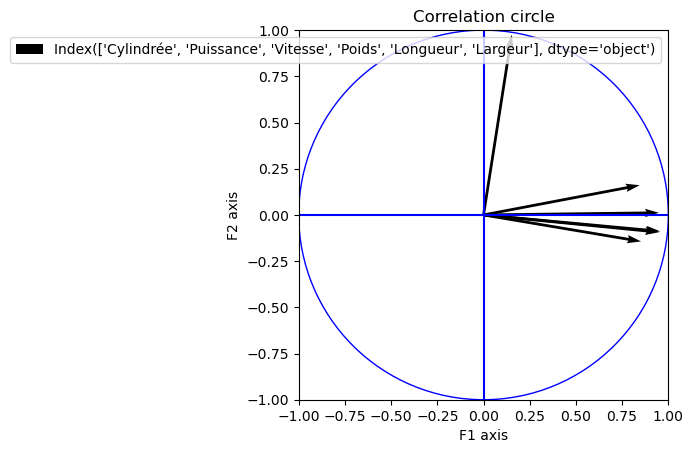

In [155]:
corr_cercle(corr_mat)

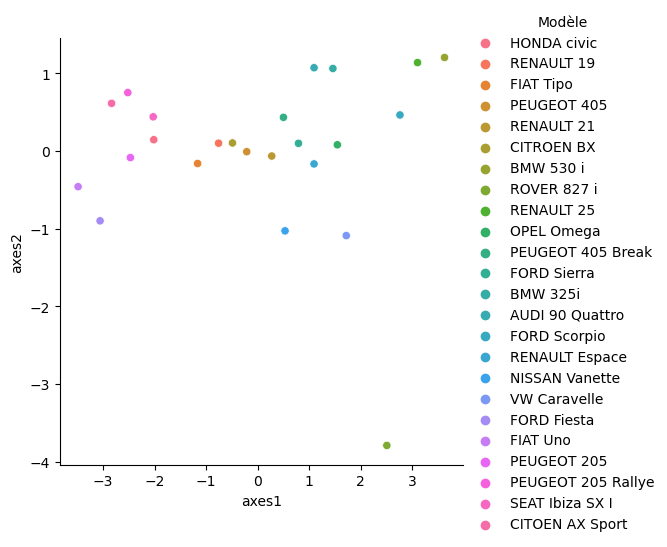

In [156]:
scatter_plot(axes_df)